In this notebook we will use this [dataset](https://www.kaggle.com/competitions/fake-news/overview)

# DATA PREP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
train_df = pd.read_csv('./gdrive/MyDrive/fake-news/train.csv', index_col='id')
test_df = pd.read_csv('./gdrive/MyDrive/fake-news/test.csv', index_col='id')

In [17]:
train_df.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [18]:
test_df.head(10)

,title,author,text
id,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 812.5+ KB


In [20]:
train_df.isnull().sum()

,0
title,558
author,1957
text,39
label,0


In [21]:
train_df[(train_df['text'].isnull()) & (train_df['label'] == 0)]

,title,author,text,label
id,,,,


As we can see, there are no such records where the text is missing, and the record would be considered reliable

In [22]:
train_df.fillna({'title': 'Unknown', 'author': 'Unknown', 'text': 'not reliable'}, inplace=True)
test_df.fillna({'title': 'Unknown', 'author': 'Unknown', 'text': 'not reliable'}, inplace=True)

In [23]:
train_df['text'] += train_df['author'] + '. ' + train_df['title'] + '. '
test_df['text'] += test_df['author'] + '. ' + test_df['title'] + '. '

train_df.drop(columns=['title', 'author'], inplace=True)
test_df.drop(columns=['title', 'author'], inplace=True)

train_df.isnull().sum(), test_df.isnull().sum()

(text     0
 label    0
 dtype: int64,
 text    0
 dtype: int64)

In [24]:
train_df.shape

(20800, 2)

label
1    10413
0    10387
Name: count, dtype: int64


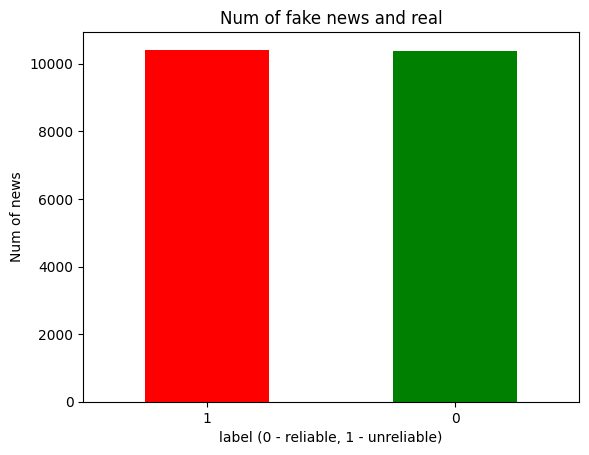

In [25]:
labels_num = train_df['label'].value_counts()
print(labels_num)
labels_num.plot(kind='bar', color=['red', 'green'])

plt.title('Num of fake news and real')
plt.xlabel('label (0 - reliable, 1 - unreliable)')
plt.ylabel('Num of news')
plt.xticks(rotation=0)
plt.show()

The number of labels is balanced. Accuracy is selected as the metric

In [26]:
train_df['text'] = train_df['text'].apply(lambda x: str(x).lower())
train_df['text'] = train_df['text'].apply(lambda x: str(x).replace('\n', ' ').replace('\t', ' '))
test_df['text'] = test_df['text'].apply(lambda x: str(x).lower())
test_df['text'] = test_df['text'].apply(lambda x: str(x).replace('\n', ' ').replace('\t', ' '))

In [27]:
train_df.head()

,text,label
id,,
0,house dem aide: we didn’t even see comey’s let...,1
1,ever get the feeling your life circles the rou...,0
2,"why the truth might get you fired october 29, ...",1
3,videos 15 civilians killed in single us airstr...,1
4,print an iranian woman has been sentenced to ...,1


# Preprocessing

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from flair.models import TextClassifier
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmanized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmanized_tokens)
    return text

def clean_dataframe(df):
    data = df.copy()
    data['clean_text'] = data['text'].apply(preprocess_text)
    # data.reset_index(inplace=True, drop=True)
    return data

In [29]:
train_df = clean_dataframe(train_df)

In [30]:
test_df = clean_dataframe(test_df)

In [31]:
train_df['label'] = '__label__' + train_df['label'].astype(str)

In [32]:
train_df['label_text'] = train_df['label'] + ' ' + train_df['clean_text']
train_df['label_text'] = train_df['label_text'].str.rstrip()
train_df

,text,label,clean_text,label_text
id,,,,
0,house dem aide: we didn’t even see comey’s let...,__label__1,house dem aide even see comey letter jason cha...,__label__1 house dem aide even see comey lette...
1,ever get the feeling your life circles the rou...,__label__0,ever get feeling life circle roundabout rather...,__label__0 ever get feeling life circle rounda...
2,"why the truth might get you fired october 29, ...",__label__1,truth might get fired october 29 2016 tension ...,__label__1 truth might get fired october 29 20...
3,videos 15 civilians killed in single us airstr...,__label__1,video 15 civilian killed single u airstrike id...,__label__1 video 15 civilian killed single u a...
4,print an iranian woman has been sentenced to ...,__label__1,print iranian woman sentenced six year prison ...,__label__1 print iranian woman sentenced six y...
...,...,...,...,...
20795,rapper t. i. unloaded on black celebrities who...,__label__0,rapper unloaded black celebrity met donald tru...,__label__0 rapper unloaded black celebrity met...
20796,when the green bay packers lost to the washing...,__label__0,green bay packer lost washington redskin week ...,__label__0 green bay packer lost washington re...
20797,the macy’s of today grew from the union of sev...,__label__0,macy today grew union several great name ameri...,__label__0 macy today grew union several great...


In [33]:
test_df

,text,clean_text
id,,
20800,"palo alto, calif. — after years of scorning...",palo alto calif year scorning political proces...
20801,russian warships ready to strike terrorists ne...,russian warship ready strike terrorist near al...
20802,videos #nodapl: native american leaders vow to...,video nodapl native american leader vow stay w...
20803,"if at first you don’t succeed, try a different...",first succeed try different sport tim tebow he...
20804,42 mins ago 1 views 0 comments 0 likes 'for th...,42 min ago 1 view 0 comment 0 like first time ...
...,...,...
25995,of all the dysfunctions that plague the world’...,dysfunction plague world megacities none may p...
25996,washington — gov. john kasich of ohio on tu...,washington gov john kasich ohio tuesday signed...
25997,good morning. (want to get california today by...,good morning want get california today email j...


Let's divide the training dataset into training and validation parts

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, dev = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

In [ ]:
train.to_csv('./fake-news/train_split.txt', columns=['label_text'], index=False, header=False)
dev.to_csv('./fake-news/dev_split.txt', columns=['label_text'], index=False, header=False)
test_df.to_csv('./fake-news/test_split.txt', columns=['label_text'], index=False, header=False)

# Classification

In [4]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Corpus
from flair.datasets import ClassificationCorpus
from flair.samplers import ImbalancedClassificationDatasetSampler

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
data_folder = './gdrive/MyDrive/fake-news/fake_news_refactored/'
label_type = 'label'

corpus: Corpus = ClassificationCorpus(data_folder,
                                      dev_file='dev_split.txt',
                                      train_file='train_split.txt',
                                      test_file=None,
                                      label_type=label_type
                                      )

2024-09-23 08:44:17,240 Reading data from gdrive/MyDrive/fake-news/fake_news_refactored
2024-09-23 08:44:17,242 Train: gdrive/MyDrive/fake-news/fake_news_refactored/train_split.txt
2024-09-23 08:44:17,244 Dev: gdrive/MyDrive/fake-news/fake_news_refactored/dev_split.txt
2024-09-23 08:44:17,246 Test: None
2024-09-23 08:44:20,274 No test split found. Using 10% (i.e. 1664 samples) of the train split as test data
2024-09-23 08:44:20,276 Initialized corpus ./gdrive/MyDrive/fake-news/fake_news_refactored/ (label type name is 'label')


In [8]:
label_dict = corpus.make_label_dictionary(label_type=label_type)

document_embeddings = TransformerDocumentEmbeddings('bert-base-uncased', fine_tune=True)

classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type=label_type)

trainer = ModelTrainer(classifier, corpus)

2024-09-23 08:46:05,898 Computing label dictionary. Progress:


0it [00:00, ?it/s]
14976it [01:45, 141.79it/s]

2024-09-23 08:47:52,523 Dictionary created for label 'label' with 2 values: 0 (seen 7489 times), 1 (seen 7487 times)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [11]:
trainer.train('./gdrive/MyDrive/fake-news/model_results/',
              embeddings_storage_mode='gpu',
              learning_rate=1e-3,
              mini_batch_size=64,
              mini_batch_chunk_size=16,
              max_epochs=5
              )

2024-09-23 09:24:06,558 ----------------------------------------------------------------------------------------------------
2024-09-23 09:24:06,562 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30523, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
            

/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:499: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")


2024-09-23 09:26:34,446 epoch 1 - iter 23/234 - loss 0.55035647 - time (sec): 147.83 - samples/sec: 9.96 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:28:58,931 epoch 1 - iter 46/234 - loss 0.53857362 - time (sec): 292.32 - samples/sec: 10.07 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:31:24,611 epoch 1 - iter 69/234 - loss 0.53006425 - time (sec): 438.00 - samples/sec: 10.08 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:33:50,363 epoch 1 - iter 92/234 - loss 0.51352466 - time (sec): 583.75 - samples/sec: 10.09 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:36:15,400 epoch 1 - iter 115/234 - loss 0.50430018 - time (sec): 728.79 - samples/sec: 10.10 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:38:40,613 epoch 1 - iter 138/234 - loss 0.49282265 - time (sec): 874.00 - samples/sec: 10.11 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:41:06,085 epoch 1 - iter 161/234 - loss 0.48035147 - time (sec): 1019.47 - samples/sec: 10.11 - lr: 0.001000 - momentum: 0.000000
202

100%|██████████| 65/65 [03:05<00:00,  2.86s/it]

2024-09-23 09:51:53,404 DEV : loss 0.3107317090034485 - f1-score (micro avg)  0.8625


2024-09-23 09:52:22,293  - 0 epochs without improvement
2024-09-23 09:52:23,022  - 0 epochs without improvement
2024-09-23 09:52:23,029  - 0 epochs without improvement
2024-09-23 09:52:23,035 saving best model
2024-09-23 09:52:24,452 ----------------------------------------------------------------------------------------------------
2024-09-23 09:54:51,855 epoch 2 - iter 23/234 - loss 0.28683491 - time (sec): 147.40 - samples/sec: 9.99 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:57:17,526 epoch 2 - iter 46/234 - loss 0.27172923 - time (sec): 293.07 - samples/sec: 10.05 - lr: 0.001000 - momentum: 0.000000
2024-09-23 09:59:42,787 epoch 2 - iter 69/234 - loss 0.26043750 - time (sec): 438.33 - samples/sec: 10.07 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:02:07,956 epoch 2 - iter 92/234 - loss 0.25361261 - time (sec): 583.50 - samples/sec: 10.09 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:04:32,400 epoch 2 - iter 115/234 - loss 0.24888040 - time (sec): 727.94 - samples/se

100%|██████████| 65/65 [03:05<00:00,  2.85s/it]

2024-09-23 10:20:08,301 DEV : loss 0.17209601402282715 - f1-score (micro avg)  0.9339


2024-09-23 10:20:36,216  - 0 epochs without improvement
2024-09-23 10:20:36,224  - 0 epochs without improvement
2024-09-23 10:20:36,234  - 0 epochs without improvement
2024-09-23 10:20:36,240 saving best model
2024-09-23 10:20:37,753 ----------------------------------------------------------------------------------------------------
2024-09-23 10:23:05,182 epoch 3 - iter 23/234 - loss 0.16674567 - time (sec): 147.42 - samples/sec: 9.98 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:25:30,377 epoch 3 - iter 46/234 - loss 0.16876542 - time (sec): 292.62 - samples/sec: 10.06 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:27:55,325 epoch 3 - iter 69/234 - loss 0.16999097 - time (sec): 437.57 - samples/sec: 10.09 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:30:19,928 epoch 3 - iter 92/234 - loss 0.16919965 - time (sec): 582.17 - samples/sec: 10.11 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:32:45,097 epoch 3 - iter 115/234 - loss 0.16689993 - time (sec): 727.34 - samples/se

100%|██████████| 65/65 [03:03<00:00,  2.83s/it]

2024-09-23 10:48:17,114 DEV : loss 0.1613415777683258 - f1-score (micro avg)  0.9404


2024-09-23 10:48:44,086  - 0 epochs without improvement
2024-09-23 10:48:44,093  - 0 epochs without improvement
2024-09-23 10:48:44,099  - 0 epochs without improvement
2024-09-23 10:48:44,104 saving best model
2024-09-23 10:48:45,580 ----------------------------------------------------------------------------------------------------
2024-09-23 10:51:13,858 epoch 4 - iter 23/234 - loss 0.12481663 - time (sec): 148.27 - samples/sec: 9.93 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:53:38,500 epoch 4 - iter 46/234 - loss 0.13192945 - time (sec): 292.91 - samples/sec: 10.05 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:56:03,218 epoch 4 - iter 69/234 - loss 0.13709157 - time (sec): 437.63 - samples/sec: 10.09 - lr: 0.001000 - momentum: 0.000000
2024-09-23 10:58:27,863 epoch 4 - iter 92/234 - loss 0.13797454 - time (sec): 582.28 - samples/sec: 10.11 - lr: 0.001000 - momentum: 0.000000
2024-09-23 11:00:52,846 epoch 4 - iter 115/234 - loss 0.13712618 - time (sec): 727.26 - samples/se

100%|██████████| 65/65 [03:03<00:00,  2.82s/it]

2024-09-23 11:16:24,817 DEV : loss 0.12559178471565247 - f1-score (micro avg)  0.9553


2024-09-23 11:16:53,183  - 0 epochs without improvement
2024-09-23 11:16:53,190  - 0 epochs without improvement
2024-09-23 11:16:53,195  - 0 epochs without improvement
2024-09-23 11:16:53,201 saving best model
2024-09-23 11:16:54,699 ----------------------------------------------------------------------------------------------------
2024-09-23 11:19:22,667 epoch 5 - iter 23/234 - loss 0.13560874 - time (sec): 147.96 - samples/sec: 9.95 - lr: 0.001000 - momentum: 0.000000
2024-09-23 11:21:47,511 epoch 5 - iter 46/234 - loss 0.12553578 - time (sec): 292.81 - samples/sec: 10.05 - lr: 0.001000 - momentum: 0.000000
2024-09-23 11:24:12,284 epoch 5 - iter 69/234 - loss 0.12925579 - time (sec): 437.58 - samples/sec: 10.09 - lr: 0.001000 - momentum: 0.000000
2024-09-23 11:26:37,291 epoch 5 - iter 92/234 - loss 0.12677806 - time (sec): 582.59 - samples/sec: 10.11 - lr: 0.001000 - momentum: 0.000000
2024-09-23 11:29:01,751 epoch 5 - iter 115/234 - loss 0.12653999 - time (sec): 727.05 - samples/se

100%|██████████| 65/65 [03:03<00:00,  2.82s/it]

2024-09-23 11:44:35,310 DEV : loss 0.11343967914581299 - f1-score (micro avg)  0.9613


2024-09-23 11:45:03,638  - 0 epochs without improvement
2024-09-23 11:45:03,647  - 0 epochs without improvement
2024-09-23 11:45:03,652  - 0 epochs without improvement
2024-09-23 11:45:03,658 saving best model
2024-09-23 11:45:07,375 ----------------------------------------------------------------------------------------------------
2024-09-23 11:45:07,438 Loading model from best epoch ...


100%|██████████| 26/26 [01:15<00:00,  2.92s/it]

2024-09-23 11:46:26,232 
Results:
- F-score (micro) 0.9579
- F-score (macro) 0.9579
- Accuracy 0.9579

By class:
              precision    recall  f1-score   support

           1     0.9640    0.9526    0.9582       843
           0     0.9519    0.9635    0.9576       821

    accuracy                         0.9579      1664
   macro avg     0.9579    0.9580    0.9579      1664
weighted avg     0.9580    0.9579    0.9579      1664

2024-09-23 11:46:26,236 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9579326923076923}

In [12]:
from flair.models import TextClassifier
from flair.data import Sentence

In [14]:
model = TextClassifier.load('./gdrive/MyDrive/fake-news/model_results/best-model.pt')
model.eval()

TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30523, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_fea

# Results evaluation

In [35]:
test_outputs = []

for index, row in test_df.iterrows():
  sentence = row['clean_text']
  sentence = Sentence(sentence)
  model.predict(sentence)
  new_row = {
      'id': index,
      'label': sentence.labels[0].value
  }
  test_outputs.append(new_row)

result_df = pd.DataFrame(test_outputs)

In [37]:
result_df.to_csv('./gdrive/MyDrive/fake-news/model_results/test_outputs.csv', index=False)

In [38]:
loss = pd.read_csv('./gdrive/MyDrive/fake-news/model_results/loss.tsv', sep='\t')

In [39]:
loss

,EPOCH,TIMESTAMP,LEARNING_RATE,TRAIN_LOSS,DEV_LOSS,DEV_PRECISION,DEV_RECALL,DEV_F1,DEV_ACCURACY
0,1,18:35:58,0.0010,0.7534,0.6983,0.5007,0.5007,0.5007,0.5007
1,2,18:50:47,0.0010,0.7080,0.7051,0.5007,0.5007,0.5007,0.5007
2,3,19:05:35,0.0010,0.7059,0.6990,0.5007,0.5007,0.5007,0.5007
3,EPOCH,TIMESTAMP,LEARNING_RATE,TRAIN_LOSS,DEV_LOSS,DEV_PRECISION,DEV_RECALL,DEV_F1,DEV_ACCURACY
4,1,19:25:03,0.0010,0.5266,0.3543,0.8505,0.8505,0.8505,0.8505
5,2,19:39:56,0.0010,0.3172,0.2255,0.9091,0.9091,0.9091,0.9091
6,3,19:54:51,0.0010,0.2294,0.1685,0.9373,0.9373,0.9373,0.9373
7,4,20:09:39,0.0010,0.1795,0.1400,0.9500,0.9500,0.9500,0.9500
8,5,20:24:32,0.0010,0.1565,0.1364,0.9500,0.9500,0.9500,0.9500
9,6,20:39:24,0.0010,0.1372,0.2026,0.9221,0.9221,0.9221,0.9221


In [55]:
train_loss = [float(loss['TRAIN_LOSS'].loc[17:].to_list()[0])] + ([float(i) for i in loss['TRAIN_LOSS'].loc[18::3].to_list()])
dev_loss = [float(loss['DEV_LOSS'].loc[17:].to_list()[0])] + ([float(i) for i in loss['DEV_LOSS'].loc[18::3].to_list()])

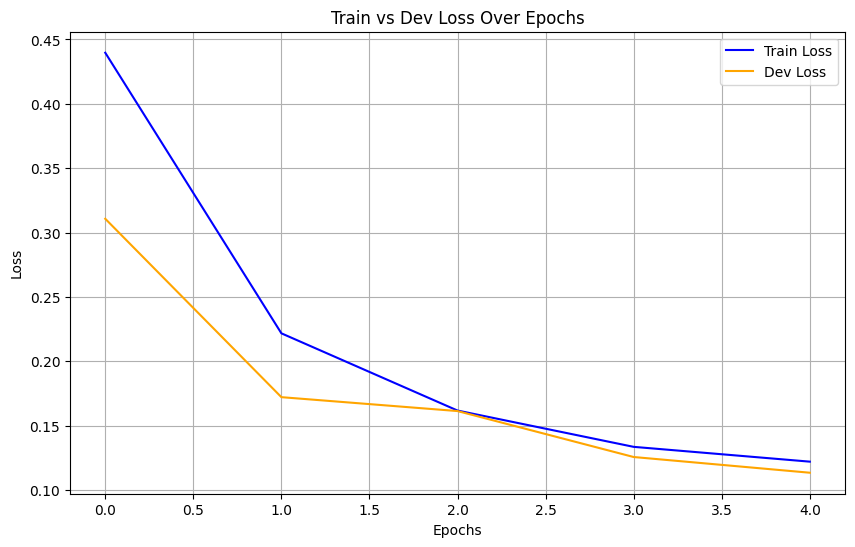

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(train_loss, label='Train Loss', color='blue')

plt.plot(dev_loss, label='Dev Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Dev Loss Over Epochs')

plt.legend()

plt.grid(True)

plt.show()